In [2]:
# !pip install idx2numpy

In [3]:
import idx2numpy
# Load the IDX file
X_train = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
print(X_train.shape)  # Check the shape of the loaded data

# Load the IDX file
X_test = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
print(X_test.shape)  # Check the shape of the loaded data

# Load the IDX file
y_train = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
print(y_train.shape)  # Check the shape of the loaded data

# Load the IDX file
y_test = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')
print(y_test.shape)  # Check the shape of the loaded data

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten each sample to a 1D vector
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)  # Should print (n_samples, n_features)
print(X_test.shape)   # Should print (n_samples, n_features)

(60000, 784)
(10000, 784)


In [5]:
## Ist step of pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_scaled=s.fit_transform(X_train)
X_test_scaled=s.transform(X_test)

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train_scaled)
X_test_trf=pca.transform(X_test_scaled)

In [9]:
import plotly.express as px
fig=px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train.astype(str),color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train_scaled)
X_test_trf=pca.transform(X_test_scaled)

In [13]:
import plotly.express as px
fig=px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train.astype(str),color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [59]:
from sklearn.decomposition import PCA
pca=PCA(n_components=236)
X_train_trf=pca.fit_transform(X_train_scaled)
X_test_trf=pca.transform(X_test_scaled)

In [60]:
pca.explained_variance_
# eigen values

array([40.48763511, 29.24169752, 26.81180449, 20.68661822, 18.07665012,
       15.73317787, 13.79060909, 12.51758909, 11.00679527, 10.05049705,
        9.62045779,  8.63097356,  7.99159687,  7.81488215,  7.37553786,
        7.13058751,  6.71398002,  6.60400749,  6.40604846,  6.23737743,
        5.93229172,  5.76059855,  5.48403364,  5.31859721,  5.12873534,
        4.96062446,  4.90533662,  4.70843497,  4.5291976 ,  4.39470849,
        4.27522172,  4.21399693,  4.09838079,  4.03181137,  3.97713624,
        3.86052409,  3.80864021,  3.72563426,  3.64393543,  3.4416973 ,
        3.41624517,  3.36378527,  3.25773631,  3.23620323,  3.204781  ,
        3.17911021,  3.14205728,  3.08588859,  3.06076556,  3.03759974,
        2.90171955,  2.86408562,  2.84980787,  2.8237422 ,  2.76632955,
        2.71778127,  2.69168208,  2.65850712,  2.61669482,  2.57622805,
        2.52662224,  2.493722  ,  2.46947024,  2.43689501,  2.40883423,
        2.40117231,  2.37950231,  2.3161347 ,  2.26774369,  2.24

In [61]:
pca.components_.shape

(236, 784)

In [62]:
import numpy as np

In [63]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 5.64671692,  9.72498891, 13.46436933, 16.34948418, 18.8705928 ,
       21.06486277, 22.98820715, 24.73400638, 26.26909869, 27.67081829,
       29.01256131, 30.21630325, 31.3308728 , 32.42079635, 33.44944558,
       34.44393214, 35.38031542, 36.30136109, 37.19479786, 38.06471048,
       38.8920735 , 39.69549087, 40.46033637, 41.20210883, 41.9174017 ,
       42.60924853, 43.2933845 , 43.95005904, 44.58173577, 45.19465561,
       45.7909109 , 46.37862732, 46.95021902, 47.51252643, 48.06720844,
       48.60562681, 49.13680906, 49.65641466, 50.16462592, 50.64463149,
       51.12108731, 51.59022667, 52.04457562, 52.49592141, 52.94288481,
       53.38626797, 53.82448343, 54.25486519, 54.68174309, 55.1053901 ,
       55.51008622, 55.90953363, 56.30698975, 56.70081055, 57.08662414,
       57.46566681, 57.84106949, 58.21184534, 58.57678972, 58.93609029,
       59.28847246, 59.6362661 , 59.98067741, 60.32054553, 60.65650007,
       60.99138603, 61.32324972, 61.64627567, 61.96255264, 62.27

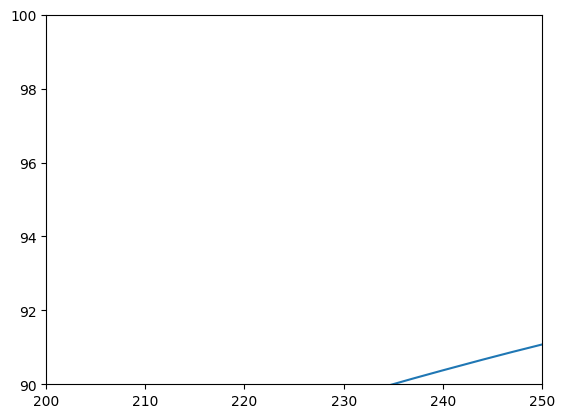

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.ylim(90,100)
plt.xlim(200,250)
plt.show()